# TomoPy with ASTRA toolbox

Documentation: https://tomopy.readthedocs.io/en/latest/ipynb/tomopy.html

In [1]:
import dxchange
import matplotlib.pyplot as plt
import numpy as np
import tomopy
import logging
import time
#logging.basicConfig(level=logging.INFO)

In [2]:
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='/mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5',
    sino=(0, 2),
)
proj = tomopy.normalize(proj, flat, dark)
rot_center = 296
proj = tomopy.minus_log(proj)

In [3]:
# auxillairy function to store timing result

def add_tm_result(db, name, t, overwrite=False):
    if (not overwrite) and name in db.keys():
        db[name] = t if t<=db[name] else db[name]
    else:
        db[name] = t
    return tm_db

tm_db = {}

### FBP

In [4]:
%%time

start = time.time()

options = {'proj_type': 'linear', 'method': 'FBP'}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_FBP', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 828 ms, sys: 8.63 ms, total: 836 ms
Wall time: 837 ms


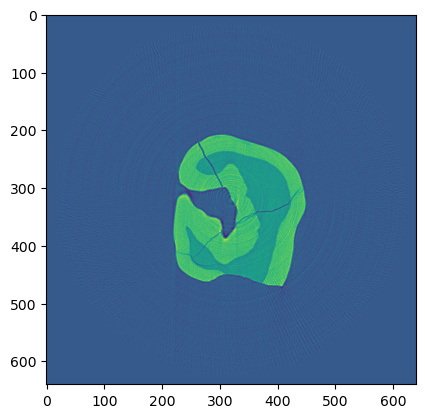

In [5]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### FBP with CUDA

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [27]:
%%time

start = time.time()

options = {'proj_type': 'cuda', 'method': 'FBP_CUDA'}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1) # ncore?

tm_db = add_tm_result(tm_db, 'astra_FBP_CUDA', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 26.7 ms, sys: 1.99 ms, total: 28.7 ms
Wall time: 26.6 ms


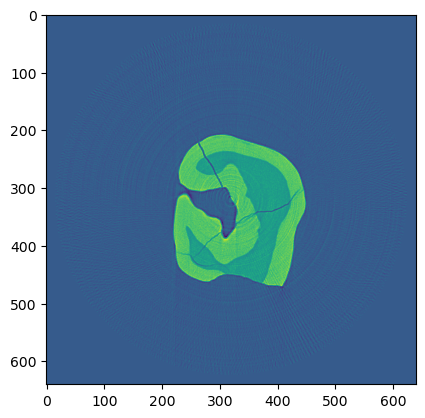

In [7]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### SIRT

In [8]:
%%time

start = time.time()

extra_options = {'MinConstraint': 0}
options = {'proj_type': 'linear', 'method': 'SIRT', 'num_iter': 100, 'extra_options': extra_options}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=2)

tm_db = add_tm_result(tm_db, 'astra_SIRT', time.time()-start);

Reconstructing 2 slice groups with 2 master threads...
CPU times: user 2min 46s, sys: 310 ms, total: 2min 46s
Wall time: 1min 23s


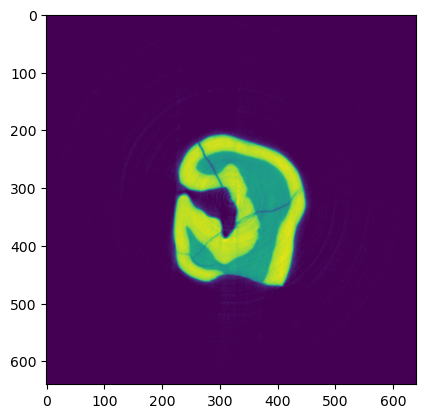

In [9]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### SIRT with CUDA

Note: **<span style="color:red">repeat the cell below at least twice !!!</span>**

In [30]:
%%time

start = time.time()

extra_options = {'MinConstraint': 0}
options = {'proj_type': 'cuda', 'method': 'SIRT_CUDA', 'num_iter': 100, 'extra_options': extra_options}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1) # kernel crashes when changing ncore: 1->2

tm_db = add_tm_result(tm_db, 'astra_SIRT_CUDA', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 129 ms, sys: 73.9 ms, total: 202 ms
Wall time: 201 ms


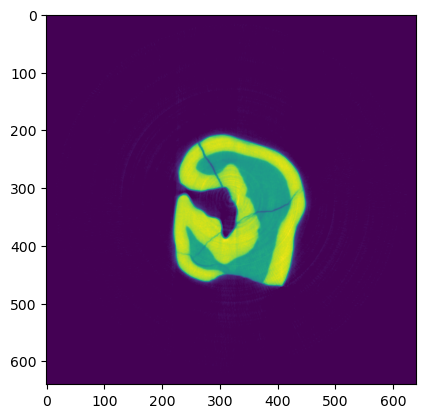

In [11]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### EM with CUDA

Note: **<span style="color:red">repeat the cell below at least twice !!!</span>**

In [32]:
%%time

start = time.time()

options = {'proj_type': 'cuda', 'method': 'EM_CUDA', 'num_iter': 64}

projx = proj.copy()
projx[projx < 0] = 0  # no values less than zero with astra_EM_CUDA

recon = tomopy.recon(projx,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_EM_CUDA', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 102 ms, sys: 43.9 ms, total: 146 ms
Wall time: 144 ms


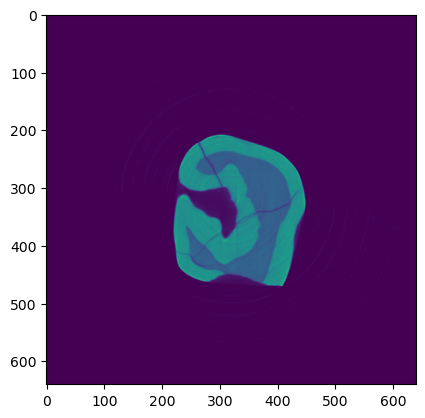

In [13]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### ART

In [14]:
%%time

start = time.time()

extra_options = {'MinConstraint': 0}
options = {'proj_type': 'linear', 'method': 'ART', 'num_iter': 500000, 'extra_options': extra_options}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_ART', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 14.5 s, sys: 39.9 ms, total: 14.5 s
Wall time: 14 s


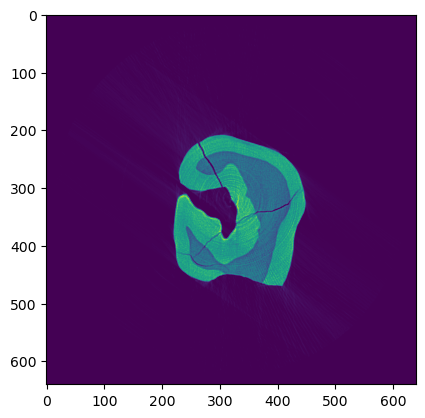

In [15]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### CGLS

In [16]:
%%time

start = time.time()

options = {'proj_type': 'linear', 'method': 'CGLS', 'num_iter': 20}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_CGLS', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 33.6 s, sys: 50.9 ms, total: 33.7 s
Wall time: 33.3 s


Note: **<span style="color:red">repeat the cell below at least twice !!!</span>**

In [36]:
%%time

start = time.time()

options = {'proj_type': 'cuda', 'method': 'CGLS_CUDA', 'num_iter': 20}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_CGLS_CUDA', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 43.5 ms, sys: 19 ms, total: 62.5 ms
Wall time: 61.2 ms


In [38]:
%%time

# multi-GPU

start = time.time()

options = {'proj_type': 'cuda', 'method': 'CGLS_CUDA', 'num_iter': 20, 'gpu_list': [0,]}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_CGLS_CUDA1', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 47.9 ms, sys: 15.9 ms, total: 63.7 ms
Wall time: 62.1 ms


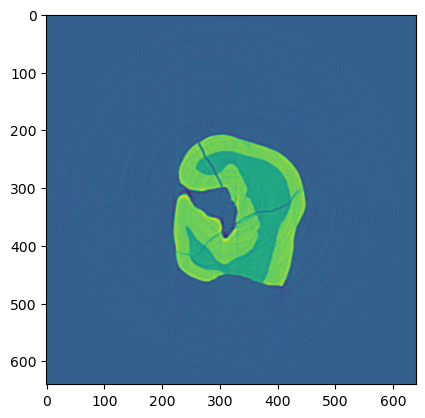

In [19]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### SART

In [20]:
%%time

start = time.time()

extra_options = {'MinConstraint': 0}
options = {'proj_type': 'linear', 'method': 'SART', 'num_iter': 500, 'extra_options': extra_options}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_SART', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 8.01 s, sys: 15 ms, total: 8.03 s
Wall time: 7.74 s


Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [42]:
%%time

start = time.time()

extra_options = {'MinConstraint': 0}
options = {'proj_type': 'cuda', 'method': 'SART_CUDA', 'num_iter': 200, 'extra_options': extra_options}

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.astra,
                     options=options,
                     ncore=1)

tm_db = add_tm_result(tm_db, 'astra_SART_CUDA', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 69 ms, sys: 65.9 ms, total: 135 ms
Wall time: 134 ms


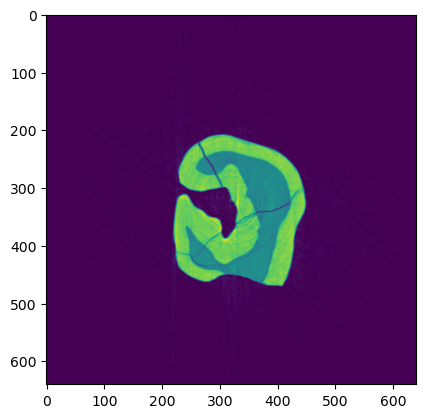

In [22]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

In [43]:
print("%20s\t %10s" % ('algorithm','time (msec)',))
print("---------------------------------------------")

for name in tm_db.keys():
    print("%20s\t %10.0f" % (name,tm_db[name]*1000,))

           algorithm	 time (msec)
---------------------------------------------
           astra_FBP	        837
      astra_FBP_CUDA	         27
          astra_SIRT	      83604
     astra_SIRT_CUDA	        201
       astra_EM_CUDA	        141
           astra_ART	      13992
          astra_CGLS	      33253
     astra_CGLS_CUDA	         60
    astra_CGLS_CUDA1	         61
          astra_SART	       7737
     astra_SART_CUDA	        134


In [44]:
import json
with open('tooth_astra.json','w') as fid:
    json.dump(tm_db,fid)